## Load data yang sudah di preprocessing

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data_clean.csv")
data.head()

,username,text,label
0,Salman Sudiro,semalem beli nasgor parkir depan indomart pas ...,0
1,RIAN PIJAT CIBARUSAH,tukang parkir sama tukang bakso tanya tanya grup,0
2,pameranbuku,mbayar lik sewu po limang ewu wehke tukang par...,0
3,JuliastutiÃ°ÂÂÂ¼,sedekahin tukang parkir annur,0
4,Aim Twister,pacar sama tukang parkir indak lama terus teru...,0


## Split data (data train, data test)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
tweet = data.text
label = data.label

In [5]:
tweet_train, tweet_test, label_train, label_test = train_test_split(tweet,label,test_size=0.3, random_state=0)

In [6]:
print('Jumlah Data tweet_train : ',len(tweet_train))
print('Jumlah Data label_train : ',len(label_train))
print('Jumlah Data tweet_test : ',len(tweet_test))
print('Jumlah Data label_test : ',len(label_test)) 

Jumlah Data tweet_train :  1015
Jumlah Data label_train :  1015
Jumlah Data tweet_test :  435
Jumlah Data label_test :  435


## TF-IDF Vectorizer

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvec = TfidfVectorizer()

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [9]:
clf_mnb = MultinomialNB()

In [10]:
#membuat pipeline MNB()
model_mnb = Pipeline([('tfidf', tfvec),
                 ('classifier', clf_mnb)])

In [11]:
#Train data X dan y menggunakan BernoulliNB()
model_mnb.fit(tweet_train, label_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [12]:
hasil_mnb = model_mnb.predict(tweet_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
confusion_matrix(hasil_mnb, label_test)

array([[ 48,   7,   9],
       [ 61, 170,  58],
       [ 14,   9,  59]], dtype=int64)

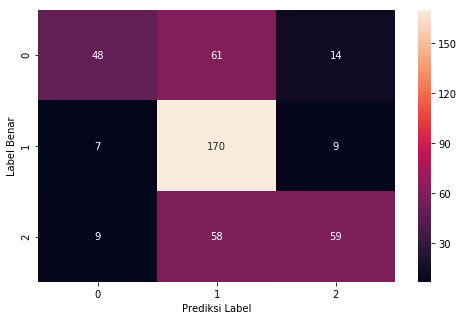

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(label_test, hasil_mnb), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Prediksi Label")
plt.ylabel("Label Benar")
plt.show()

In [17]:
#Convert hasil ke list (hasil tadinya dalam bentuk ndarray)

l_hasil = list(hasil_mnb)
print("Prediksi tweet baik: " + str(l_hasil.count(2)))
print("Prediksi tweet kurang baik: " + str(l_hasil.count(1)))
print("Prediksi tweet irelevant: " + str(l_hasil.count(0)))

num = 100*(l_hasil.count(2)/tweet_test.count())

print("Persentase tweet baik = {:.2f} %".format(num)) 

acc = 100*accuracy_score(hasil_mnb,label_test)

print("Ketelitian = {:.2f} %".format(acc))

Prediksi tweet baik: 82
Prediksi tweet kurang baik: 289
Prediksi tweet irelevant: 64
Persentase tweet baik = 18.85 %
Ketelitian = 63.68 %


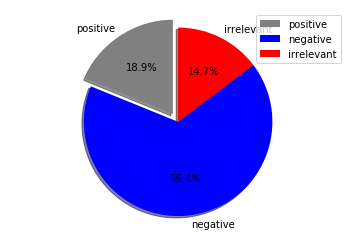

In [18]:
import matplotlib.pyplot as plt

sizes = [l_hasil.count(2), l_hasil.count(1),  l_hasil.count(0)]
labels = ['positive','negative', 'irrelevant']
colors = ['gray', 'blue', 'red']
explode = (0.1,0,0)

#patches, texts = plt.pie(sizes, colors=colors, startangle=-270)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels, loc="best")
plt.show()

In [19]:
import numpy as np

In [28]:
coba = np.array(["tukang parkir sopan"])
coba_vector = tfvec.transform(coba) 
sentimen = clf_mnb.predict(coba_vector)
print(sentimen)

[1]


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
classification_report(hasil_mnb, label_test)

'             precision    recall  f1-score   support\n\n          0       0.39      0.75      0.51        64\n          1       0.91      0.59      0.72       289\n          2       0.47      0.72      0.57        82\n\navg / total       0.75      0.64      0.66       435\n'

In [31]:
import pickle
# Nama fike tempat menyimpan data
model = 'model_klasifikasi.data'
# Siapkan file untuk ditulis
f = open(model, 'wb')
# Simpan data nama siswa ke dalam file dengan perintah dump
pickle.dump(model_mnb, f)
f.close() # tutup setelah file digunakan